In [228]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, stats
import statsmodels.api as sm
from sklearn.cluster import KMeans

In [373]:
# List csv files
for file in glob.glob("*.csv"):
    print (file)

minuteIntensitiesWide_merged.csv
dailyActivity_merged.csv
sleepDay_merged.csv
heartrate_seconds_merged.csv
minuteIntensitiesNarrow_merged.csv
minuteMETsNarrow_merged.csv
hourlySteps_merged.csv
hourlyIntensities_merged.csv
dailyCalories_merged.csv
hourlyCalories_merged.csv
minuteSleep_merged.csv
minuteCaloriesNarrow_merged.csv
dailySteps_merged.csv
minuteCaloriesWide_merged.csv
minuteStepsNarrow_merged.csv
minuteStepsWide_merged.csv
weightLogInfo_merged.csv
dailyIntensities_merged.csv


In [32]:
df_daily = pd.read_csv('dailyActivity_merged.csv')
df_sleep = pd.read_csv('sleepDay_merged.csv')
df_hr = pd.read_csv('heartrate_seconds_merged.csv')
df_log = pd.read_csv('weightLogInfo_merged.csv')

In [344]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [351]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Id      int64         
 1   Time    datetime64[ns]
 2   Value   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 45.8 MB


In [53]:
df_daily['Calories'].mean()

2303.609574468085

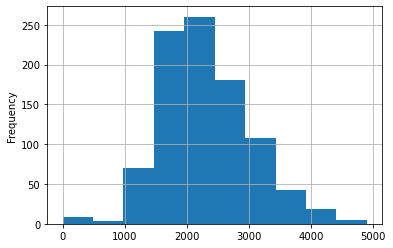

In [55]:
# normally distributed
df_daily['Calories'].plot(kind = 'hist', grid = True)

In [156]:
# how many users? 
len(df_daily['Id'].unique())

33

In [41]:
# date time change 
df_daily['ActivityDate'] = pd.to_datetime(df_daily['ActivityDate'])

In [42]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [44]:
df_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [43]:
df_sleep['SleepDay'] = pd.to_datetime(df_sleep['SleepDay'])

In [39]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [36]:
df_hr.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [37]:
df_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [47]:
df_log['Date'] = pd.to_datetime(df_log['Date'])

In [48]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   WeightKg        67 non-null     float64       
 3   WeightPounds    67 non-null     float64       
 4   Fat             2 non-null      float64       
 5   BMI             67 non-null     float64       
 6   IsManualReport  67 non-null     bool          
 7   LogId           67 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 3.9 KB


In [49]:
df_log

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,2016-05-06 06:43:35,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,2016-05-08 07:35:53,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,2016-05-09 06:39:44,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,2016-05-11 06:51:47,85.400002,188.274775,NaN,25.559999,False,1462949507000


In [56]:
# merge sleep and calories 
sleep_calories = pd.merge(df_daily, df_sleep,  how='right', left_on=['Id','ActivityDate'], right_on = ['Id','SleepDay'])

In [231]:
sleep_calories

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,2016-04-17,1,700,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896,2016-04-30,1,343,360
409,8792009665,2016-05-01,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962,2016-05-01,1,503,527
410,8792009665,2016-05-02,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015,2016-05-02,1,415,423
411,8792009665,2016-05-03,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297,2016-05-03,1,516,545


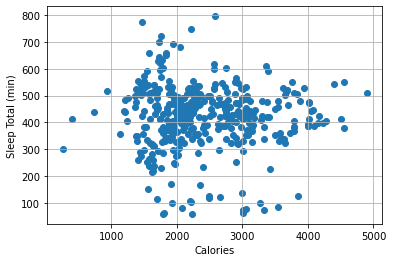

In [77]:
plt.scatter(x = sleep_calories['Calories'], y = sleep_calories['TotalMinutesAsleep'])
plt.xlabel('Calories')
plt.ylabel('Sleep Total (min)')
plt.grid()
plt.show()

In [225]:
corr, _ = pearsonr(sleep_calories['Calories'], sleep_calories['TotalMinutesAsleep']) # pearson's linear correlation

In [226]:
corr # no linear corr between calories and sleep duration.

-0.02852571334282005

In [352]:
df_daily

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [ ]:
# overall correlations

In [67]:
corr = sleep_calories.corr()

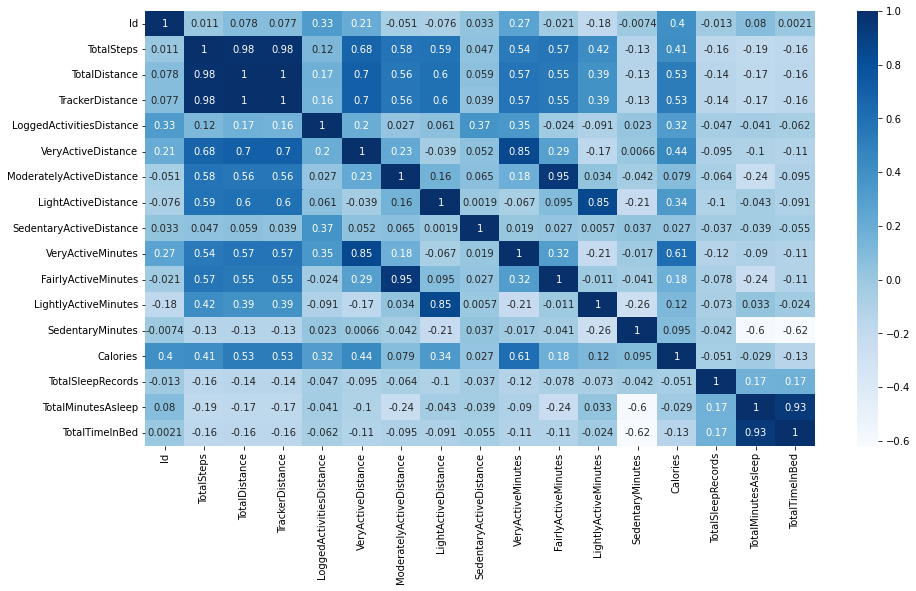

In [70]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap="Blues", annot=True, )

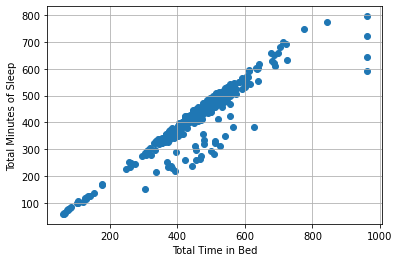

In [86]:
plt.scatter(x = sleep_calories['TotalTimeInBed'], y = sleep_calories['TotalMinutesAsleep'])
plt.xlabel('Total Time in Bed')
plt.ylabel('Total Minutes of Sleep')
plt.grid()

In [83]:
corr, _ = pearsonr(sleep_calories['TotalTimeInBed'], sleep_calories['TotalMinutesAsleep']) # pearson's linear correlation

In [118]:
corr # linear correlation coefficient score

0.930457454132363

In [87]:
x = sleep_calories['TotalTimeInBed']
y = sm.add_constant(sleep_calories['TotalMinutesAsleep'])

/Users/hyorimlee/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [88]:
a = sm.OLS(x,y)

In [90]:
b = a.fit()

In [91]:
b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TotalTimeInBed   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     2650.
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          2.58e-181
Time:                        20:06:48   Log-Likelihood:                -2171.8
No. Observations:                 413   AIC:                             4348.
Df Residuals:                     411   BIC:                             4356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 39.4627      8.459      4.665      0.000      22.834      56.091
TotalMinutesAsleep     0.9993      0.019     51.483      0.000       0.961       1.037
==============================================================================
Omnibus:                      317.765   Durbin-Watson:                   0.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3817.716
Skew:                           3.347   Prob(JB):                         0.00
Kurtosis:                      16.305   Cond. No.                     1.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
b.params

const                 39.462705
TotalMinutesAsleep     0.999307
dtype: float64

In [102]:
X_test = np.array([1, 400])

In [103]:
b.get_prediction(X_test).summary_frame(alpha=0.05) 

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,439.185408,2.325256,434.614531,443.756286,347.415056,530.95576


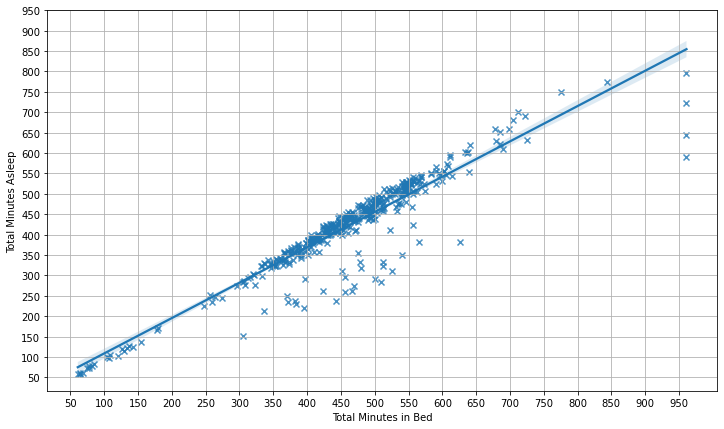

In [354]:
fig, ax = plt.subplots(figsize = (12,7))
sns.regplot(x= "TotalTimeInBed", y= "TotalMinutesAsleep", data=sleep_calories, marker = 'x', ci = 80)
plt.xticks(range(50,1000,50))
plt.yticks(range(50,1000,50))
plt.xlabel('Total Minutes in Bed')
plt.ylabel('Total Minutes Asleep')
plt.grid()
plt.savefig('ci80sleep.png')

In [127]:
X_test = np.array([1, 480])
b.get_prediction(X_test).summary_frame(alpha=0.20) 

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,519.129949,2.577709,515.821164,522.438734,459.18791,579.071988


In [144]:
df_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000


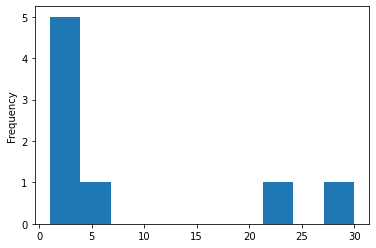

In [159]:
df_log.groupby('Id').count().Date.plot(kind = 'hist')

In [151]:
# only 8 users updated weights during 2 months. 
df_log.groupby('Id').count()

,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
Id,,,,,,,
1503960366,2,2,2,1,2,2,2
1927972279,1,1,1,0,1,1,1
2873212765,2,2,2,0,2,2,2
4319703577,2,2,2,1,2,2,2
4558609924,5,5,5,0,5,5,5
5577150313,1,1,1,0,1,1,1
6962181067,30,30,30,0,30,30,30
8877689391,24,24,24,0,24,24,24


In [222]:
# Not many people actually log for weight input. 
# we can send them a notification to input weights 

In [163]:
df_log['Id'].unique()

array([1503960366, 1927972279, 2873212765, 4319703577, 4558609924,
       5577150313, 6962181067, 8877689391])

In [169]:
df_daily[~df_daily['Id'].isin(df_log['Id'].unique())]

2291.2582972582973

In [193]:
# users who don't log in for weight input
no_log_users = df_daily[~df_daily['Id'].isin(df_log['Id'].unique())]

In [218]:
no_log_users

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
31,1624580081,2016-04-12,8163,5.31,5.31,0.0,0.0,0.0,5.31,0.00,0,0,146,1294,1432
32,1624580081,2016-04-13,7007,4.55,4.55,0.0,0.0,0.0,4.55,0.00,0,0,148,1292,1411
33,1624580081,2016-04-14,9107,5.92,5.92,0.0,0.0,0.0,5.91,0.01,0,0,236,1204,1572
34,1624580081,2016-04-15,1510,0.98,0.98,0.0,0.0,0.0,0.97,0.00,0,0,96,1344,1344
35,1624580081,2016-04-16,5370,3.49,3.49,0.0,0.0,0.0,3.49,0.00,0,0,176,1264,1463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,8792009665,2016-05-06,0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0,0,0,1440,1688
905,8792009665,2016-05-07,0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0,0,0,1440,1688
906,8792009665,2016-05-08,0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0,0,0,1440,1688
907,8792009665,2016-05-09,0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0,0,0,1440,1688


In [194]:
# users who log in for weight updates
log_users = df_daily[df_daily['Id'].isin(df_log['Id'].unique())]

In [195]:
no_log_users.describe().Calories

count     693.000000
mean     2291.258297
std       707.617129
min         0.000000
25%      1742.000000
50%      2198.000000
75%      2812.000000
max      4900.000000
Name: Calories, dtype: float64

In [196]:
log_users.describe().Calories

count     247.000000
mean     2338.263158
std       747.353324
min         0.000000
25%      1897.500000
50%      2092.000000
75%      2487.500000
max      4552.000000
Name: Calories, dtype: float64

In [184]:
707.617129/747.353324 # we can assume their variances are equal (between 0.5 and 2)

0.9468307777272962

In [199]:
stats.ttest_ind(a=no_log_users.Calories, b=log_users.Calories, equal_var=True)
# Since the p-value is pretty high ( > 0.05 ), we can say the users who log in have higher calories burnt every day. 


Ttest_indResult(statistic=-0.8831158271187738, pvalue=0.3773999660739328)

In [200]:
df_hr.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [203]:
df_hr['Time'] = pd.to_datetime(df_hr['Time'])

In [204]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Id      int64         
 1   Time    datetime64[ns]
 2   Value   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 56.8 MB


In [358]:
df_hr[df_hr.Id == 8877689391]

,Id,Time,Value


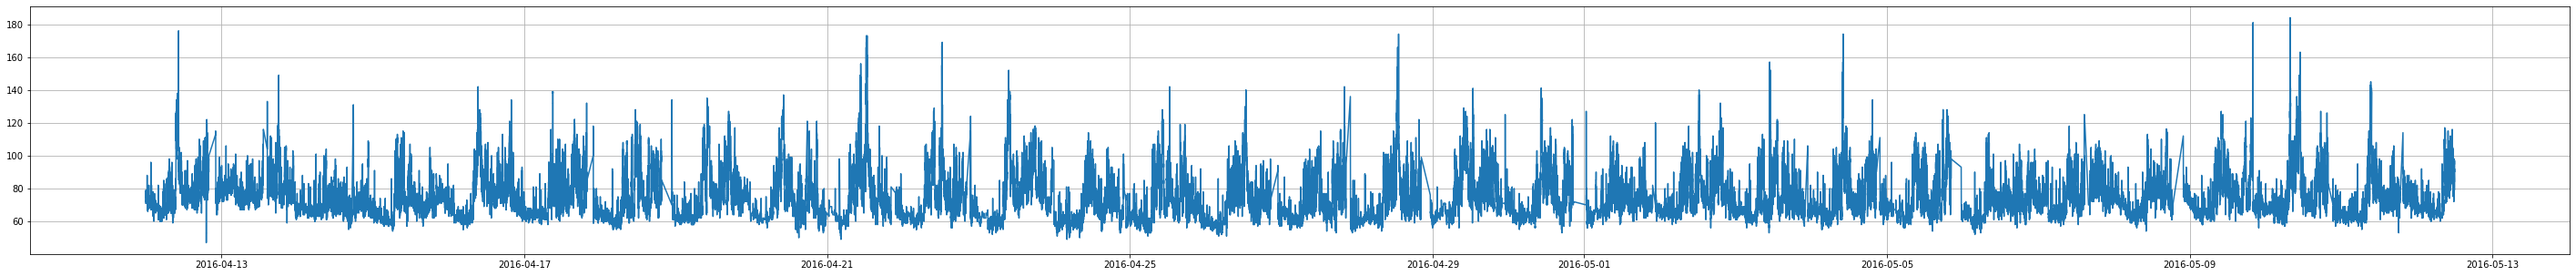

In [362]:
plt.figure(figsize  = (50,5))
plt.plot(df_hr[df_hr.Id == 6962181067].Time, df_hr[df_hr.Id == 6962181067].Value)
plt.grid()
plt.savefig('normal.png')

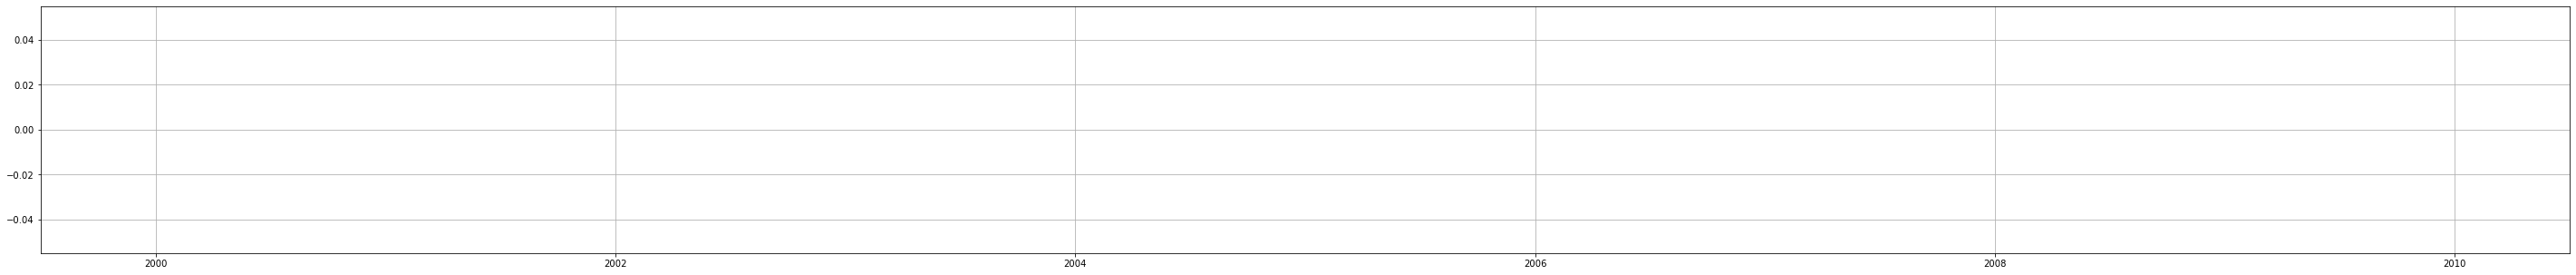

In [364]:
plt.figure(figsize  = (50,5))
plt.plot(df_hr[df_hr.Id == 1624580081].Time, df_hr[df_hr.Id == 1624580081].Value)
plt.grid()
plt.savefig('empty.png')

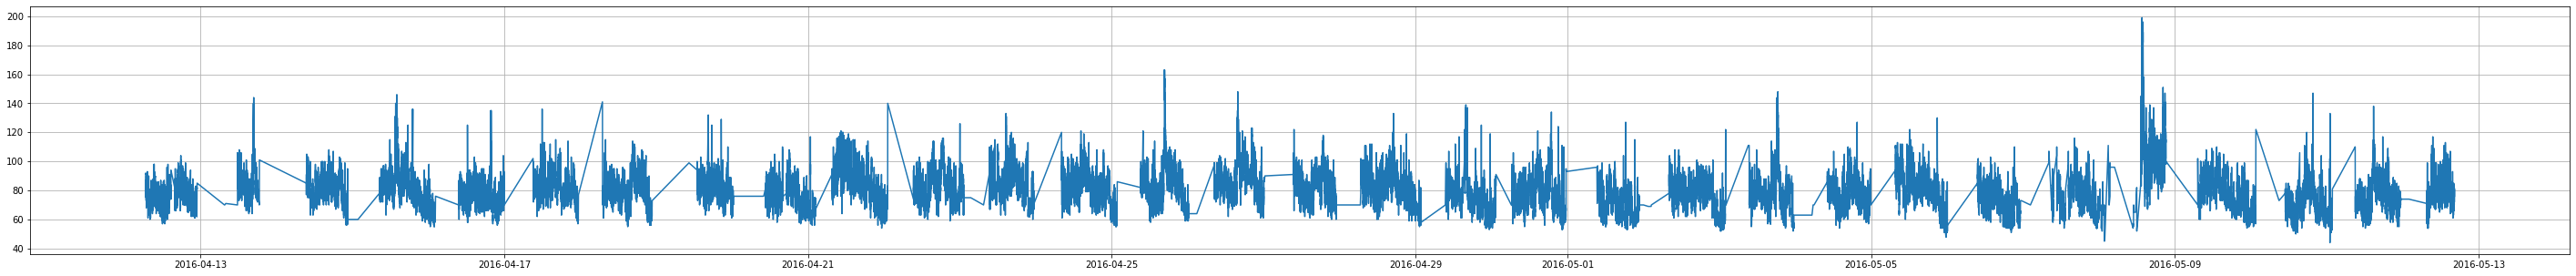

In [372]:
plt.figure(figsize  = (50,5))
plt.plot(df_hr[df_hr.Id == 4558609924].Time, df_hr[df_hr.Id == 4558609924].Value)
plt.grid()
plt.savefig('partial.png')

## Data discrepancy > hearbeat timeseries data seem not very accurate. I wonder if this is users not participating or device issues. 

In [233]:
sleep_calories

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,2016-04-17,1,700,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896,2016-04-30,1,343,360
409,8792009665,2016-05-01,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962,2016-05-01,1,503,527
410,8792009665,2016-05-02,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015,2016-05-02,1,415,423
411,8792009665,2016-05-03,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297,2016-05-03,1,516,545


In [326]:
X = sleep_calories[['TotalMinutesAsleep', 'SedentaryMinutes']].values

In [327]:
wcss = [] # = within cluster sum of squares

In [328]:
for i in range (1,10):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

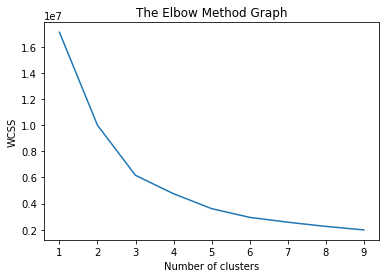

In [355]:
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [331]:
kmeans = KMeans(n_clusters=6, init ='k-means++', max_iter=300,  n_init=10,random_state=0)

In [338]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300,  n_init=10,random_state=0)

In [339]:
y_kmeans = kmeans.fit_predict(X)

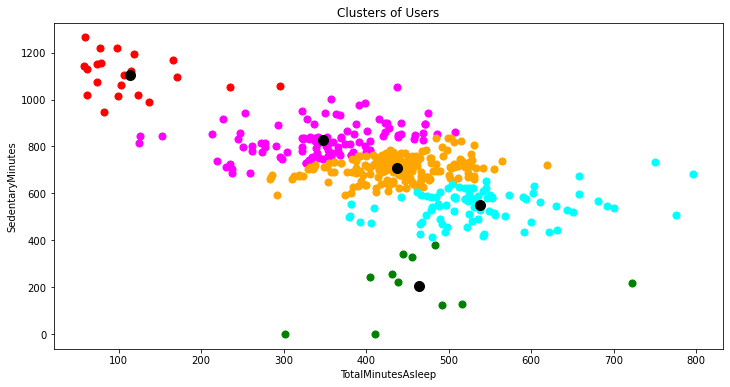

In [356]:

plt.figure(figsize = (12,6))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=50, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=50, c='magenta', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=50, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=50, c='orange', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=50, c='cyan', label ='Cluster 5')
#plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=50, c='orange', label ='Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label = 'Centroids')
plt.title('Clusters of Users')
plt.xlabel('TotalMinutesAsleep')
plt.ylabel('SedentaryMinutes')
plt.savefig('clusters.png')
plt.show()

In [375]:
# red cluster > unhealthiest users 